In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb



data = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/kcnt1_2_THIRD/Network_outputs/Compiled_Networks.csv'

data_df = pd.read_csv(data)

data_df.head()


,Run_ID,DIV,Time,Chip_ID,IBI,Burst_Peak,Number_Bursts,Spike_per_Burst
0,2,6,14-Aug-2023 10:51:02,16856,7.862857,3.726621,36,1762.361111
1,4,6,14-Aug-2023 11:36:41,16850,9.532143,3.493076,29,1068.862069
2,6,6,14-Aug-2023 11:52:59,16665,22.981818,5.206312,12,3764.166667
3,8,6,14-Aug-2023 12:10:34,16792,5.639216,4.075652,52,1916.269231
4,10,6,14-Aug-2023 12:27:10,16821,2.411215,3.520722,108,265.324074


In [9]:
active_data = '/mnt/disk15tb/paula/Main_DA_Projects/Ref_Files/KCNT1_2_data/active_electrodes.xlsx'
active_data_df = pd.read_excel(active_data)
active_data_df.head()

,Date,DIV,Assay,Run #,Chip #,Chip ID,Neuron Source,Active
0,2023-08-14,6,Sparse 7x,1,1,16856,WT cortex,34.95
1,2023-08-14,6,Sparse 7x,3,4,16850,WT cortex,30.76
2,2023-08-14,6,Sparse 7x,5,5,16665,WT cortex,43.09
3,2023-08-14,6,Sparse 7x,7,6,16792,WT cortex,42.00
4,2023-08-14,6,Sparse 7x,9,7,16821,WT cortex,19.35


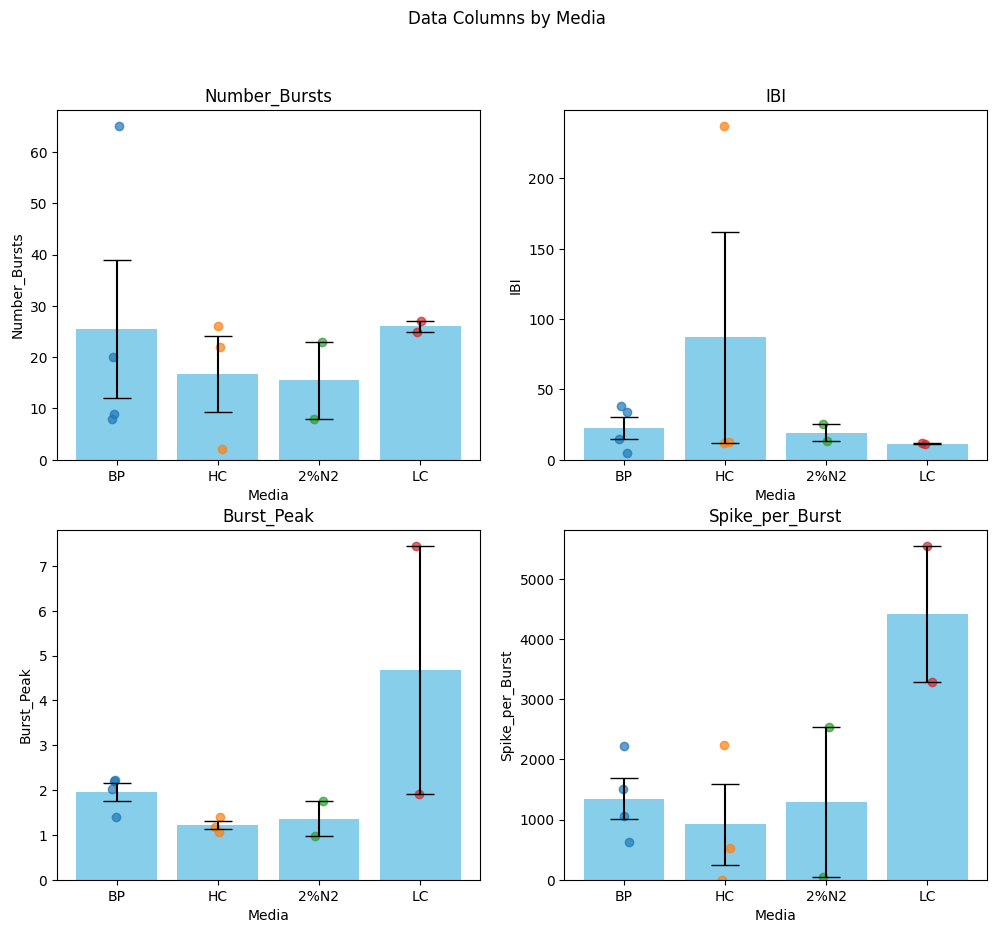

In [23]:

df = data_df

data_columns = ['Number_Bursts','IBI', 'Burst_Peak', 'Spike_per_Burst']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Data Columns by Media')

for idx, col_name in enumerate(data_columns):
    ax = axs[idx//2,idx%2]
    # Group data by 'media' and get Burst_Peak values for each group
    media_data = [df[df['media'] == media][col_name] for media in df['media'].unique()]

    # Calculate the mean and SEM for each media group
    mean_values = [data.mean() for data in media_data]
    sem_values = [data.sem() for data in media_data]

    # Create a bar plot with error bars
    #plt.figure(figsize=(8, 6))
    ax.bar(df['media'].unique(), mean_values, yerr=sem_values, capsize=10, color='skyblue')

    for i, media in enumerate(df['media'].unique()):
        x = np.full(len(media_data[i]), i) + (np.random.rand(len(media_data[i])) - 0.5) * 0.1
        ax.scatter(x, media_data[i], label=f'{media} values', alpha=0.7)


    ax.set_title(f'{col_name}')
    ax.set_xlabel('Media')
    ax.set_ylabel(f'{col_name}')
    # plt.show()
plt.savefig("./combined_plot.pdf",format='pdf')

## SYNGAP Plots.


In [2]:
import pandas as pd
df = pd.read_csv('/home/mmp/Documents/script_output/Syngap_organoid_12sep/Network_outputs/Compiled_Networks.csv') 

In [3]:
df.head(8)

,Run_ID,DIV,Time,Chip_ID,IBI,Burst_Peak,Number_Bursts,Spike_per_Burst,Active
0,87,84,24-Aug-2023 17:44:53,21670,11.516000,5.757001,26,4405.192308,11.45
1,89,84,24-Aug-2023 18:32:49,21625,8.979394,2.122950,34,617.617647,1.91
2,91,84,24-Aug-2023 19:08:29,21648,15.662222,4.051514,19,3728.947368,5.61
3,93,84,24-Aug-2023 19:50:20,21661,19.651429,7.654178,15,2153.200000,2.77
4,99,84,25-Aug-2023 19:49:48,21609,16.726250,5.995735,17,1888.764706,3.24
5,101,84,25-Aug-2023 20:24:58,21664,13.544000,2.922939,21,600.904762,1.62
6,103,84,25-Aug-2023 21:01:38,21613,16.324444,6.580559,19,6250.052632,8.34
7,105,84,25-Aug-2023 21:35:50,21644,17.380000,5.762366,17,1357.882353,2.19


In [4]:
# Define a function to assign values to the "line" column based on the "Chip_ID" values
def assign_line(chip_id):
    if chip_id in [21670, 21648, 21609, 21613]:
        return 'syngap control'
    elif chip_id in [21625, 21661, 21664, 21644]:
        return 'Syngap'
    else:
        return None

# Apply the function to create the "line" column
df['line'] = df['Chip_ID'].apply(assign_line)

In [5]:
df.head(5)

,Run_ID,DIV,Time,Chip_ID,IBI,Burst_Peak,Number_Bursts,Spike_per_Burst,Active,line
0,87,84,24-Aug-2023 17:44:53,21670,11.516000,5.757001,26,4405.192308,11.45,syngap control
1,89,84,24-Aug-2023 18:32:49,21625,8.979394,2.122950,34,617.617647,1.91,Syngap
2,91,84,24-Aug-2023 19:08:29,21648,15.662222,4.051514,19,3728.947368,5.61,syngap control
3,93,84,24-Aug-2023 19:50:20,21661,19.651429,7.654178,15,2153.200000,2.77,Syngap
4,99,84,25-Aug-2023 19:49:48,21609,16.726250,5.995735,17,1888.764706,3.24,syngap control


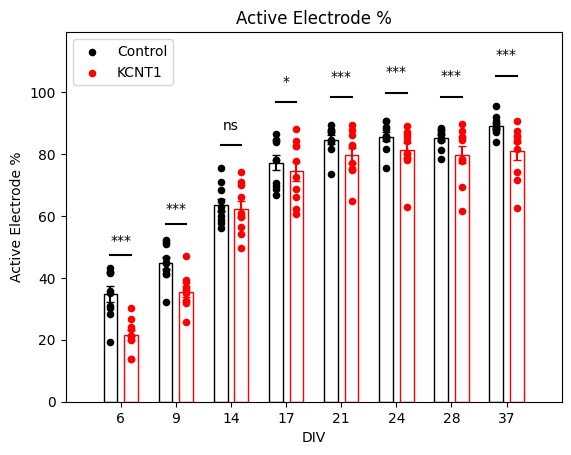

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
def plot_network_graph(working_df,output_type):
    #extract data based on assay_type
  
    #pdb.set_trace()
    df = working_df
    #create assay title
    #assay_title = 'Network ' + assay_type.title()
    #assay_type = df['Assay'].unique()[0].title()
    #define input based on output
   
    if output_type == 'Active':
        title = 'Active Electrode %'
    #div array
    div = df['DIV'].unique()
    total_div = len(div)
    #output array
    wt = []
    het = []
    for i in div: #fill data from data frame
        temp_df = df.loc[(df['DIV'] == i) & (df['Neuron Source'] == 'WT cortex')]
        wt.append(np.array(temp_df[output_type]))
        temp_df = df.loc[(df['DIV'] == i) & (df['Neuron Source'] == 'HET cortex')]
        het.append(np.array(temp_df[output_type]))

    ##plot
    # bar width
    w = total_div/32
    #create x-coordinates of bars
    x_day = [] #creat x-axis values
    for i in range(0,len(div)):
        x_day.append(int(div[i]))
    x_wt = []
    x_het = []   
    x_d = list(range(1,total_div+1)) #create x-axis bar centers
    for i in x_d:
        x_wt.append(i-w*.75)
        x_het.append(i+w*.75)
    #data series
    y_wt = wt
    y_het = het
    file_path = title + '_y_wt.txt'
    y_wt_list = [list(row) for row in y_wt]

    with open(file_path, 'w') as f:
        for row in y_wt_list:
            f.write('\t'.join(map(str, row)) + '\n')
    
    file_path = title + '_y_het.txt'

    y_het_list = [list(row) for row in y_het]

    with open(file_path, 'w') as f:
        for row in y_het_list:
            f.write('\t'.join(map(str, row)) + '\n')
    #do some ttest
   
    #plotting
    fig, ax = plt.subplots()
    #plot WT bar
    mean_wt = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_wt]
    yerr_wt = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_wt]
    n_wt = [len(yi) for yi in y_wt]
    mean_het = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_het]
    yerr_het = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_het]
    n_het = [len(yi) for yi in y_het]
    output_file = title + '_wt_statistics.txt'
    with open(output_file, 'w') as file:
        file.write("WT Statistics\n")
        file.write("Mean: " + ", ".join([str(m) for m in mean_wt]) + "\n")
        file.write("SEM: " + ", ".join([str(sem) for sem in yerr_wt]) + "\n")
        file.write("Sample Size (n): " + ", ".join([str(n) for n in n_wt]) + "\n")
    output_file = title + '_het_statistics.txt'
    with open(output_file, 'w') as file:
        file.write("HeT Statistics\n")
        file.write("Mean: " + ", ".join([str(m) for m in mean_het]) + "\n")
        file.write("SEM: " + ", ".join([str(sem) for sem in yerr_het]) + "\n")
        file.write("Sample Size (n): " + ", ".join([str(n) for n in n_het]) + "\n")
    
    p_values =[]

    for i in range(len(mean_wt)):

        t_stat,p_value = stats.ttest_ind_from_stats(mean_wt[i],yerr_wt[i],n_wt[i],
                                                    
                                                    mean_het[i],yerr_het[i],n_het[i])
        p_values.append(p_value)
    
    ax.bar(x_wt, 
            height=mean_wt,
            yerr= yerr_wt,    # error bars
            capsize=3, # error bar cap width in points
            width=w,    # bar width
            color=(0,0,0,0),  # face color transparent
            edgecolor='black',
            ecolor='black')
    #plot HET bar
    ax.bar(x_het, 
            height=mean_het,
            yerr=yerr_het,    # error bars
            capsize=3, # error bar cap width in points
            width=w,    # bar width
            color=(0,0,0,0),  # face color transparent
            edgecolor='red',
            ecolor='red')
    #plot wt and het scatters
    for i in range(len(x_wt)):
        wt_scatter = ax.scatter(x_wt[i]+np.zeros(y_wt[i].size), y_wt[i], color='black', label='Control', s=20)
    for i in range(len(x_het)):
        het_scatter = ax.scatter(x_het[i]+np.zeros(y_het[i].size), y_het[i], color='red', label='KCNT1', s=20)
    for i in range(len(x_wt)):
        # wt_data = [n for n in y_wt[i] if np.isfinite(n)]
        # het_data = [n for n in y_het[i] if np.isfinite(n)]
        # t_stat, p_value = stats.ttest_ind(wt_data, het_data)

        maxim = max(np.max(y_wt[i]), np.max(y_het[i]))
        p_value = p_values[i]
        if p_value > 0.05:
            ax.plot([x_wt[i], x_het[i]], [maxim + 0.1*maxim] * 2, 'k', linewidth=1.5)
            ax.text((x_wt[i] + x_het[i]) / 2, maxim + 0.15*maxim, "ns", ha='center', va='bottom', fontsize=10)
            continue
        elif p_value <= 0.001 :
            ax.plot([x_wt[i], x_het[i]], [maxim+ 0.1*maxim] * 2, 'k', linewidth=1.5)
            ax.text((x_wt[i] + x_het[i]) / 2, maxim + 0.15*maxim, "***", ha='center', va='bottom', fontsize=10)
            continue
        elif p_value <= 0.01 :
            ax.plot([x_wt[i], x_het[i]], [maxim+ 0.1*maxim] * 2, 'k', linewidth=1.5)
            ax.text((x_wt[i] + x_het[i]) / 2, maxim + 0.15*maxim, "**", ha='center', va='bottom', fontsize=10)
            continue
        elif p_value <= 0.05 :
            ax.plot([x_wt[i], x_het[i]], [maxim+ 0.1*maxim] * 2, 'k', linewidth=1.5)
            ax.text((x_wt[i] + x_het[i]) / 2, maxim + 0.15*maxim, "*", ha='center', va='bottom', fontsize=10)
            continue
        
    #axis scaling
    xmin = 0
    xmax = (max(df['DIV']) - xmin)*1.25
    ymin = 0
    ymax = (max(df[output_type]) - ymin)*1.25
    #labelings
    ax.legend(handles=[wt_scatter,het_scatter])
    plt.title(title)
    plt.xlabel('DIV')
    plt.ylabel(title)
    plt.xticks(x_d, x_day)
    plt.axis([xmin, total_div + 1, ymin, ymax])

    #save plot
    #plt.savefig(opt_dir + '/' + assay_title + ' ' + title +'.pdf', dpi=300)
    return fig
data_columns = ['Active']

for i in data_columns:
    fig = plot_network_graph(active_data_df,i)
    fig.savefig(f'/home/mmp/Documents/Images_25sep/KCTN1_{i}_NetworkPlot.pdf',dpi=300,format='pdf')


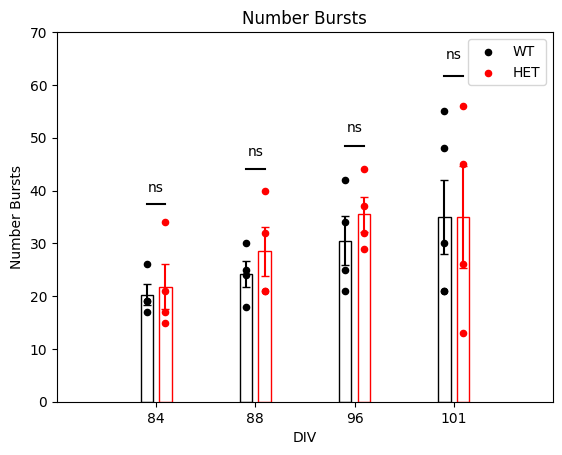

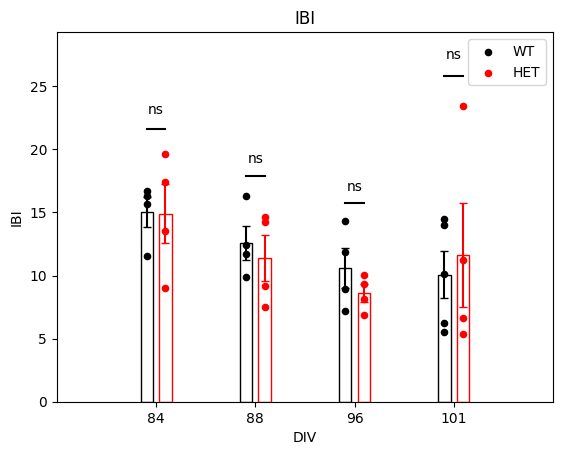

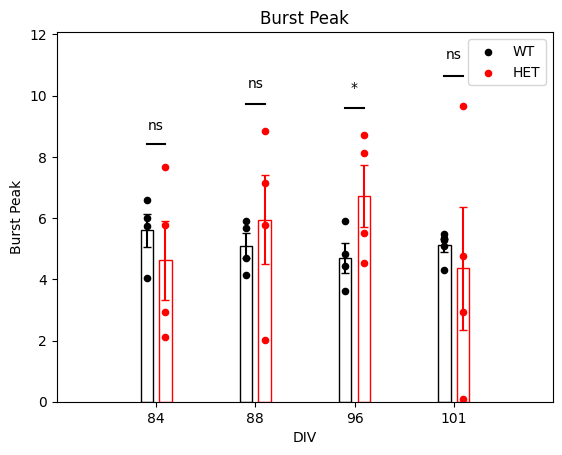

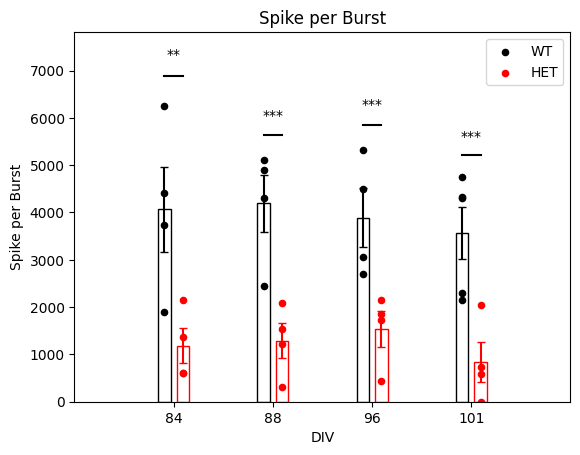

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
def plot_network_graph(working_df,output_type):
    #extract data based on assay_type
  
    #pdb.set_trace()
    df = working_df
    #create assay title
    #assay_title = 'Network ' + assay_type.title()
    #assay_type = df['Assay'].unique()[0].title()
    #define input based on output
    if output_type == 'IBI':
        title = 'IBI'
    if output_type == 'Burst_Peak':
        title = 'Burst Peak'
    if output_type == 'Number_Bursts':
        title = 'Number Bursts'
    if output_type == 'Spike_per_Burst':
        title = 'Spike per Burst'
    if output_type == 'Active':
        title = 'Active Electrode %'
    #div array
    div = df['DIV'].unique()
    total_div = len(div)
    #output array
    wt = []
    het = []
    for i in div: #fill data from data frame
        temp_df = df.loc[(df['DIV'] == i) & (df['line'] == 'syngap control')]
        wt.append(np.array(temp_df[output_type]))
        temp_df = df.loc[(df['DIV'] == i) & (df['line'] == 'Syngap')]
        het.append(np.array(temp_df[output_type]))

    ##plot
    # bar width
    w = total_div/32
    #create x-coordinates of bars
    x_day = [] #creat x-axis values
    for i in range(0,len(div)):
        x_day.append(int(div[i]))
    x_wt = []
    x_het = []   
    x_d = list(range(1,total_div+1)) #create x-axis bar centers
    for i in x_d:
        x_wt.append(i-w*.75)
        x_het.append(i+w*.75)
    #data series
    y_wt = wt
    y_het = het
    file_path = title + '_y_wt.txt'
    y_wt_list = [list(row) for row in y_wt]

    with open(file_path, 'w') as f:
        for row in y_wt_list:
            f.write('\t'.join(map(str, row)) + '\n')
    
    file_path = title + '_y_het.txt'

    y_het_list = [list(row) for row in y_het]

    with open(file_path, 'w') as f:
        for row in y_het_list:
            f.write('\t'.join(map(str, row)) + '\n')
    #do some ttest
   
    #plotting
    fig, ax = plt.subplots()
    #plot WT bar
    mean_wt = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_wt]
    yerr_wt = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_wt]
    n_wt = [len(yi) for yi in y_wt]
    mean_het = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_het]
    yerr_het = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_het]
    n_het = [len(yi) for yi in y_het]
    output_file = title + '_wt_statistics.txt'
    with open(output_file, 'w') as file:
        file.write("WT Statistics\n")
        file.write("Mean: " + ", ".join([str(m) for m in mean_wt]) + "\n")
        file.write("SEM: " + ", ".join([str(sem) for sem in yerr_wt]) + "\n")
        file.write("Sample Size (n): " + ", ".join([str(n) for n in n_wt]) + "\n")
    output_file = title + '_het_statistics.txt'
    with open(output_file, 'w') as file:
        file.write("HeT Statistics\n")
        file.write("Mean: " + ", ".join([str(m) for m in mean_het]) + "\n")
        file.write("SEM: " + ", ".join([str(sem) for sem in yerr_het]) + "\n")
        file.write("Sample Size (n): " + ", ".join([str(n) for n in n_het]) + "\n")
    
    p_values =[]

    for i in range(len(mean_wt)):

        t_stat,p_value = stats.ttest_ind_from_stats(mean_wt[i],yerr_wt[i],n_wt[i],
                                                    
                                                    mean_het[i],yerr_het[i],n_het[i])
        p_values.append(p_value)
    
    ax.bar(x_wt, 
            height=mean_wt,
            yerr= yerr_wt,    # error bars
            capsize=3, # error bar cap width in points
            width=w,    # bar width
            color=(0,0,0,0),  # face color transparent
            edgecolor='black',
            ecolor='black')
    #plot HET bar
    ax.bar(x_het, 
            height=mean_het,
            yerr=yerr_het,    # error bars
            capsize=3, # error bar cap width in points
            width=w,    # bar width
            color=(0,0,0,0),  # face color transparent
            edgecolor='red',
            ecolor='red')
    #plot wt and het scatters
    for i in range(len(x_wt)):
        wt_scatter = ax.scatter(x_wt[i]+np.zeros(y_wt[i].size), y_wt[i], color='black', label='WT', s=20)
    for i in range(len(x_het)):
        het_scatter = ax.scatter(x_het[i]+np.zeros(y_het[i].size), y_het[i], color='red', label='HET', s=20)
    for i in range(len(x_wt)):
        # wt_data = [n for n in y_wt[i] if np.isfinite(n)]
        # het_data = [n for n in y_het[i] if np.isfinite(n)]
        # t_stat, p_value = stats.ttest_ind(wt_data, het_data)

        maxim = max(np.max(y_wt[i]), np.max(y_het[i]))
        p_value = p_values[i]
        if p_value > 0.05:
            ax.plot([x_wt[i], x_het[i]], [maxim + 0.1*maxim] * 2, 'k', linewidth=1.5)
            ax.text((x_wt[i] + x_het[i]) / 2, maxim + 0.15*maxim, "ns", ha='center', va='bottom', fontsize=10)
            continue
        elif p_value <= 0.001 :
            ax.plot([x_wt[i], x_het[i]], [maxim+ 0.1*maxim] * 2, 'k', linewidth=1.5)
            ax.text((x_wt[i] + x_het[i]) / 2, maxim + 0.15*maxim, "***", ha='center', va='bottom', fontsize=10)
            continue
        elif p_value <= 0.01 :
            ax.plot([x_wt[i], x_het[i]], [maxim+ 0.1*maxim] * 2, 'k', linewidth=1.5)
            ax.text((x_wt[i] + x_het[i]) / 2, maxim + 0.15*maxim, "**", ha='center', va='bottom', fontsize=10)
            continue
        elif p_value <= 0.05 :
            ax.plot([x_wt[i], x_het[i]], [maxim+ 0.1*maxim] * 2, 'k', linewidth=1.5)
            ax.text((x_wt[i] + x_het[i]) / 2, maxim + 0.15*maxim, "*", ha='center', va='bottom', fontsize=10)
            continue
        
    #axis scaling
    xmin = 0
    xmax = (max(df['DIV']) - xmin)*1.25
    ymin = 0
    ymax = (max(df[output_type]) - ymin)*1.25
    #labelings
    ax.legend(handles=[wt_scatter,het_scatter])
    plt.title(title)
    plt.xlabel('DIV')
    plt.ylabel(title)
    plt.xticks(x_d, x_day)
    plt.axis([xmin, total_div + 1, ymin, ymax])

    #save plot
    #plt.savefig(opt_dir + '/' + assay_title + ' ' + title +'.pdf', dpi=300)
    return fig
data_columns = ['Number_Bursts','IBI', 'Burst_Peak', 'Spike_per_Burst']

for i in data_columns:
    fig = plot_network_graph(df,i)
    fig.savefig(f'/home/mmp/Documents/Images_25sep/{i}_NetworkPlot.pdf',dpi=300)


In [23]:
condition = df['DIV']==89
df= df[~condition]

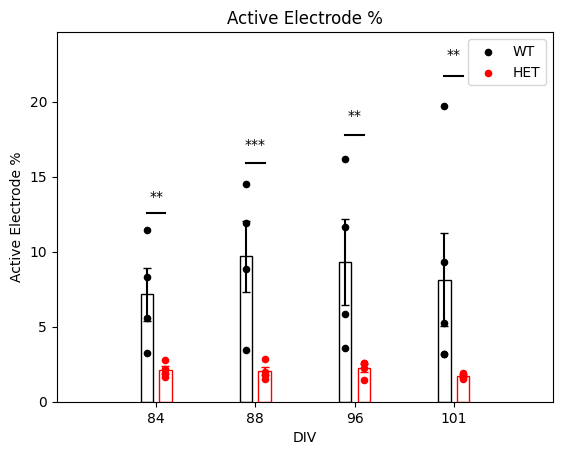

In [24]:
fig = plot_network_graph(df,'Active')
fig.savefig('/home/mmp/Documents/Images_25sep/activity_plots.pdf',dpi=300)

In [43]:
df_new = df[df['Active']>=3]
df_new.head()

,Run_ID,DIV,Time,Chip_ID,IBI,Burst_Peak,Number_Bursts,Spike_per_Burst,Active,line
0,87,84,24-Aug-2023 17:44:53,21670,11.516000,5.757001,26,4405.192308,11.45,syngap control
2,91,84,24-Aug-2023 19:08:29,21648,15.662222,4.051514,19,3728.947368,5.61,syngap control
4,99,84,25-Aug-2023 19:49:48,21609,16.726250,5.995735,17,1888.764706,3.24,syngap control
6,103,84,25-Aug-2023 21:01:38,21613,16.324444,6.580559,19,6250.052632,8.34,syngap control
8,109,88,29-Aug-2023 18:33:33,21613,16.291765,5.900836,18,5119.000000,8.87,syngap control


/home/mmp/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/mmp/.local/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

> /home/mmp/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py(6361)_equal_var_ttest_denom()
   6359     df = n1 + n2 - 2.0
   6360     svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
-> 6361     denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
   6362     return df, denom
   6363 



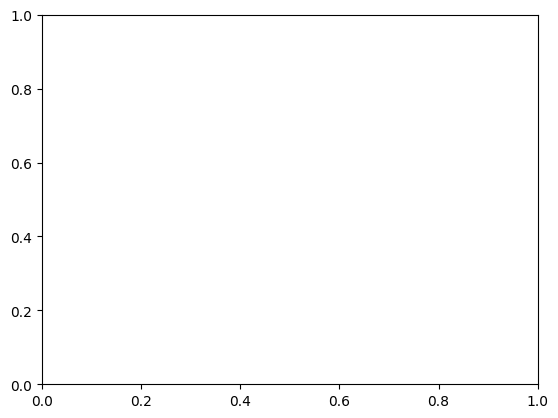

In [44]:
data_columns = ['Number_Bursts','IBI', 'Burst_Peak', 'Spike_per_Burst']

for i in data_columns:
    plot_network_graph(df_new,i)

In [25]:
df = pd.read_excel('/home/mmp/Documents/compilation_idnividual_units.xlsx')
df.head()

,DIV,CHIP_ID,Units,FR,Amplitude Median,Peak_to_trough,Peak_to_valley,half_width
0,85,21661,1,2.760000,201.416016,0.000445,-0.117201,0.000160
1,85,21661,2,1.813333,44.059753,0.000490,-0.112353,0.000275
2,85,21661,4,2.523333,44.059753,0.000620,-0.063316,0.000145
3,85,21661,6,2.273333,44.059753,0.000665,-0.028057,0.000120
4,85,21661,7,4.093333,56.648254,0.000590,-0.025290,0.000120


In [26]:
# Define a function to assign values to the "line" column based on the "Chip_ID" values
def assign_line(chip_id):
    if chip_id in [21670, 21648, 21609, 21613]:
        return 'syngap control'
    elif chip_id in [21625, 21661, 21664, 21644]:
        return 'Syngap'
    else:
        return None

# Apply the function to create the "line" column
df['line'] = df['CHIP_ID'].apply(assign_line)

In [27]:
#df['DIV'] = pd.Categorical(df['DIV'], categories=df['DIV'].unique(), ordered=True)
df.head()

,DIV,CHIP_ID,Units,FR,Amplitude Median,Peak_to_trough,Peak_to_valley,half_width,line
0,85,21661,1,2.760000,201.416016,0.000445,-0.117201,0.000160,Syngap
1,85,21661,2,1.813333,44.059753,0.000490,-0.112353,0.000275,Syngap
2,85,21661,4,2.523333,44.059753,0.000620,-0.063316,0.000145,Syngap
3,85,21661,6,2.273333,44.059753,0.000665,-0.028057,0.000120,Syngap
4,85,21661,7,4.093333,56.648254,0.000590,-0.025290,0.000120,Syngap


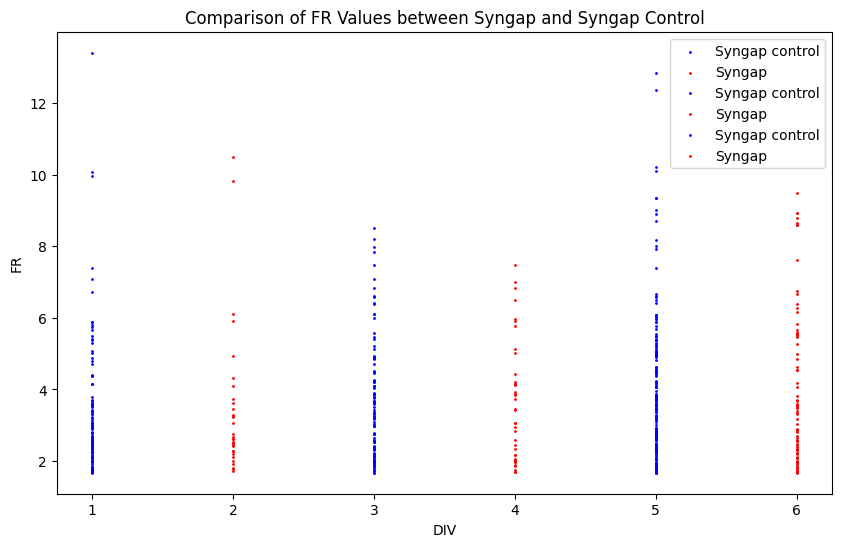

In [23]:
# Filter the DataFrame for 'Syngap' and 'Syngap control' lines
syngap_df = df[df['line'] == 'Syngap']
syngap_control_df = df[df['line'] == 'syngap control']

# Create a scatter plot with different shapes for CHIP_ID
plt.figure(figsize=(10, 6))
idx2 = 0
for idx, div in enumerate(syngap_df['DIV'].unique()):
    idx2 = idx *2
    control_fr = syngap_control_df[syngap_control_df['DIV']== div]['FR']
    syngap_fr = syngap_df[syngap_df['DIV']==div]['FR']
    plt.scatter([idx2+1]*len(control_fr), control_fr, label='Syngap control', marker='o', s=1,color = 'blue')
    plt.scatter([idx2+2]*len(syngap_fr), syngap_fr, label='Syngap', marker='o', s=1, color = 'red')

unique_div_values = sorted(df['DIV'].unique())
#plt.xticks(unique_div_values, unique_div_values)
# Customize the plot
plt.title('Comparison of FR Values between Syngap and Syngap Control')
plt.xlabel('DIV')
plt.ylabel('FR')
plt.legend()


# Show the plot
plt.show()

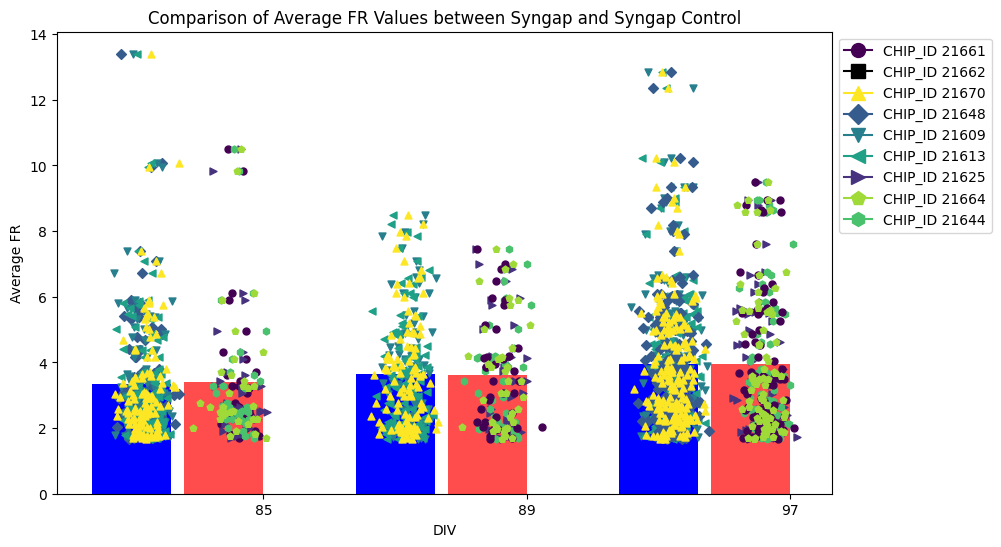

In [52]:
# Filter the DataFrame for 'Syngap' and 'Syngap control' lines
syngap_df = df[df['line'] == 'Syngap']
syngap_control_df = df[df['line'] == 'syngap control']

# Create a bar plot with 'Syngap' and 'Syngap control' side by side for each unique 'DIV'
unique_div_values = sorted(df['DIV'].unique())
bar_width = 0.3  # Width of each bar
scatter_width = 0.1  # Width of scatter points

# Calculate the positions for 'Syngap' and 'Syngap control' bars and scatter points
syngap_control_positions = np.arange(len(unique_div_values))
syngap_positions = syngap_control_positions + bar_width + scatter_width / 2

# Calculate the average FR values for 'Syngap' and 'Syngap control' for each DIV
syngap_means = [syngap_df[syngap_df['DIV'] == div]['FR'].mean() for div in unique_div_values]
syngap_control_means = [syngap_control_df[syngap_control_df['DIV'] == div]['FR'].mean() for div in unique_div_values]
chip_id_to_marker = {
    21661: 'o',
    21662: 's',
    21670: '^',
    21648: 'D',
    21609: 'v',
    21613: '<',
    21625: '>',
    21664: 'p',
    21644: 'h'
}
# Create a dictionary to map CHIP_ID values to unique colors
unique_chip_ids = df['CHIP_ID'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_chip_ids)))  # Use a colormap for unique colors
chip_id_to_color = dict(zip(unique_chip_ids, colors))

# Create legend handles and labels for CHIP_ID
legend_handles = []
legend_labels = []
for chip_id, marker in chip_id_to_marker.items():
    color = chip_id_to_color.get(chip_id, 'black')
    legend_handles.append(plt.Line2D([0], [0], marker=marker, color=color, markersize=10, label=f'CHIP_ID {chip_id}'))
    legend_labels.append(f'CHIP_ID {chip_id}')
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(syngap_positions, syngap_means, label='Syngap', width=bar_width, color='red', align='center',alpha=0.7)
plt.bar(syngap_control_positions, syngap_control_means, label='Syngap control', width=bar_width, color='blue', align='center')

# Add scatter points for all data points on appropriate DIV bars
for div in unique_div_values:
    syngap_x = syngap_positions[unique_div_values.index(div)] + scatter_width / 2
    syngap_y = syngap_df[syngap_df['DIV'] == div]['FR']
    
    syngap_control_x = syngap_control_positions[unique_div_values.index(div)] + scatter_width / 2
    syngap_control_y = syngap_control_df[syngap_control_df['DIV'] == div]['FR']
   # Plot scatter points with different marker shapes based on CHIP_ID
    for chip_id in df[df['DIV'] == div]['CHIP_ID'].unique():
        chip_id_x = syngap_x if chip_id in syngap_df[syngap_df['DIV'] == div]['CHIP_ID'].unique() else syngap_control_x
        chip_id_y = syngap_y if chip_id in syngap_df[syngap_df['DIV'] == div]['CHIP_ID'].unique() else syngap_control_y
        marker = chip_id_to_marker.get(chip_id, 'o')  # Default to 'o' if CHIP_ID not in the dictionary
        # Assign unique colors to each CHIP_ID
        color = chip_id_to_color.get(chip_id, 'black')
        noise = np.random.normal(0, 0.05,len(chip_id_y))
        chip_id_y_with_noise = chip_id_y 
        
        plt.scatter([chip_id_x] * len(chip_id_y_with_noise)+noise, chip_id_y_with_noise, label=f'CHIP_ID {chip_id}', marker=marker, s=25,color = color)

# Set x-axis labels and ticks
plt.xticks(syngap_positions + bar_width / 2, unique_div_values)

# Customize the plot
plt.title('Comparison of Average FR Values between Syngap and Syngap Control')
plt.xlabel('DIV')
plt.ylabel('Average FR')
#plt.legend()
# Create a custom legend for CHIP_ID
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

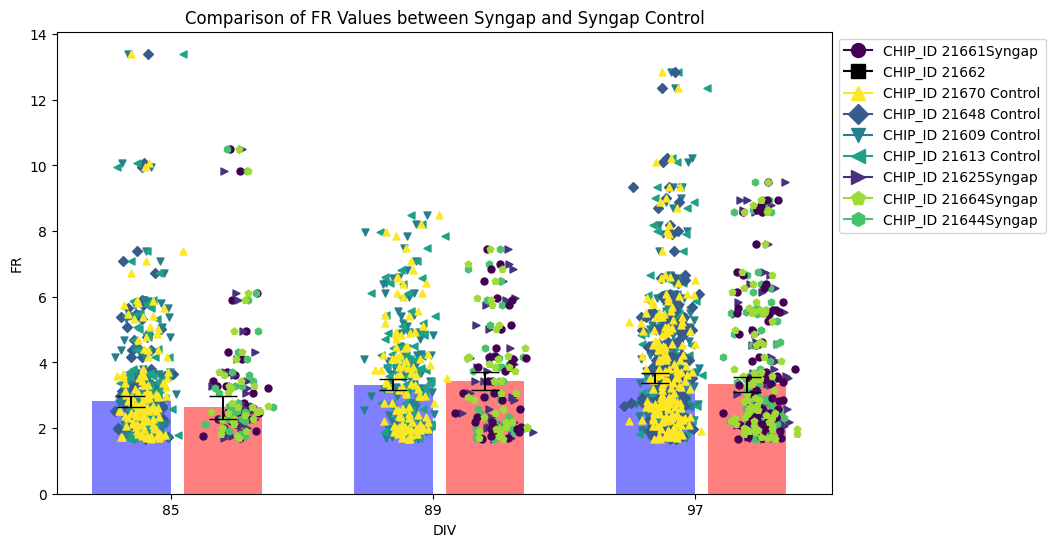

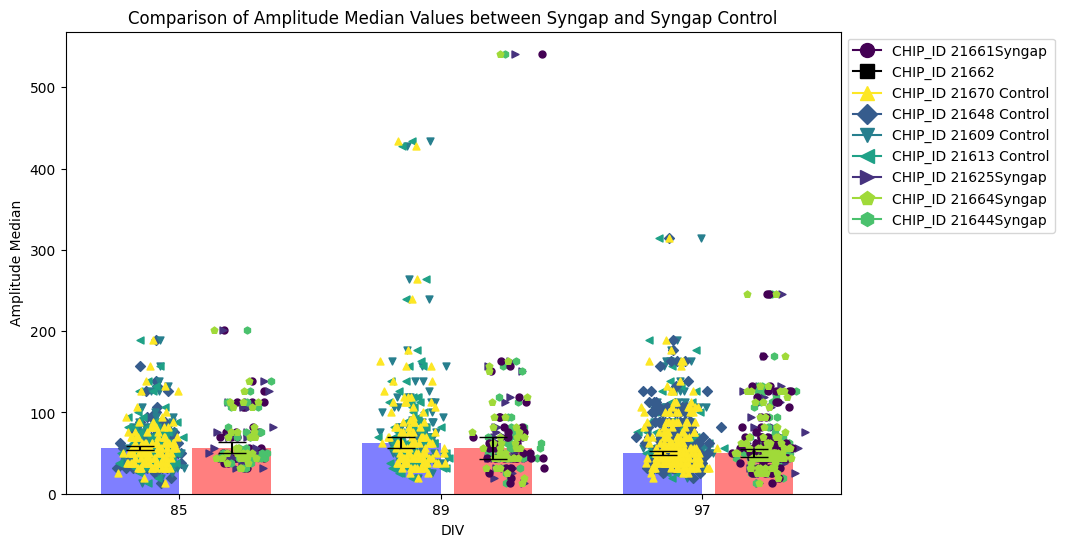

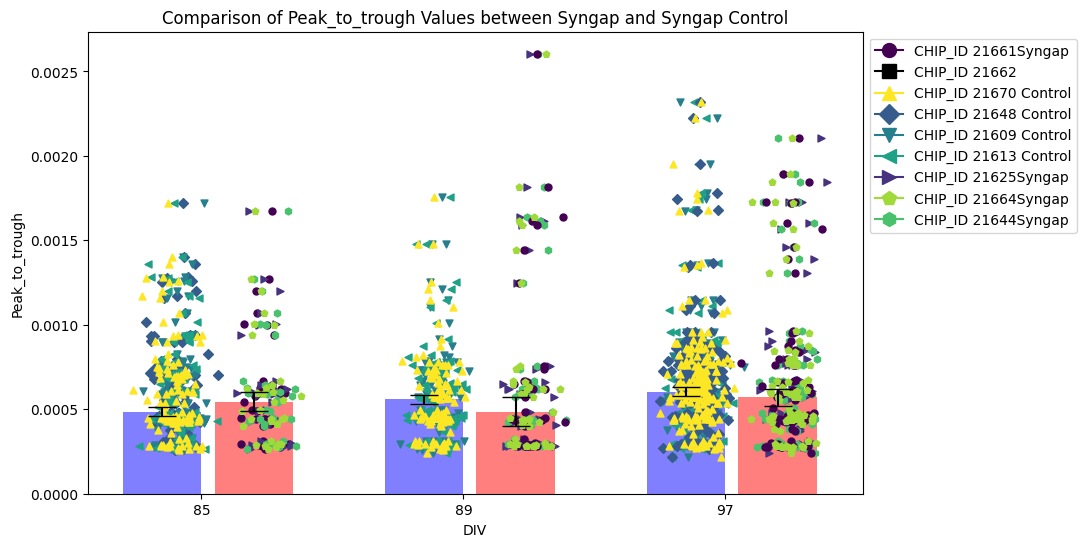

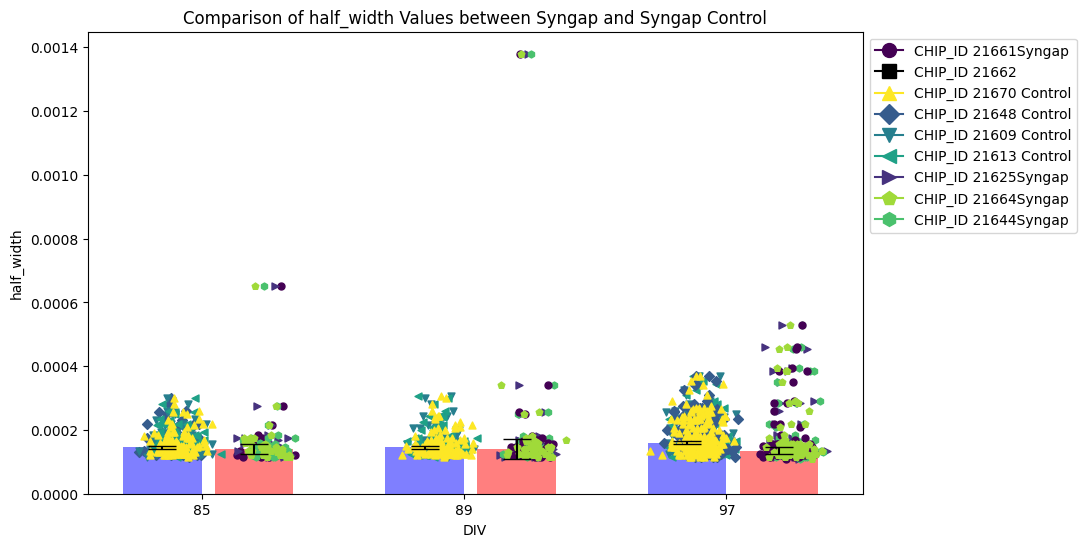

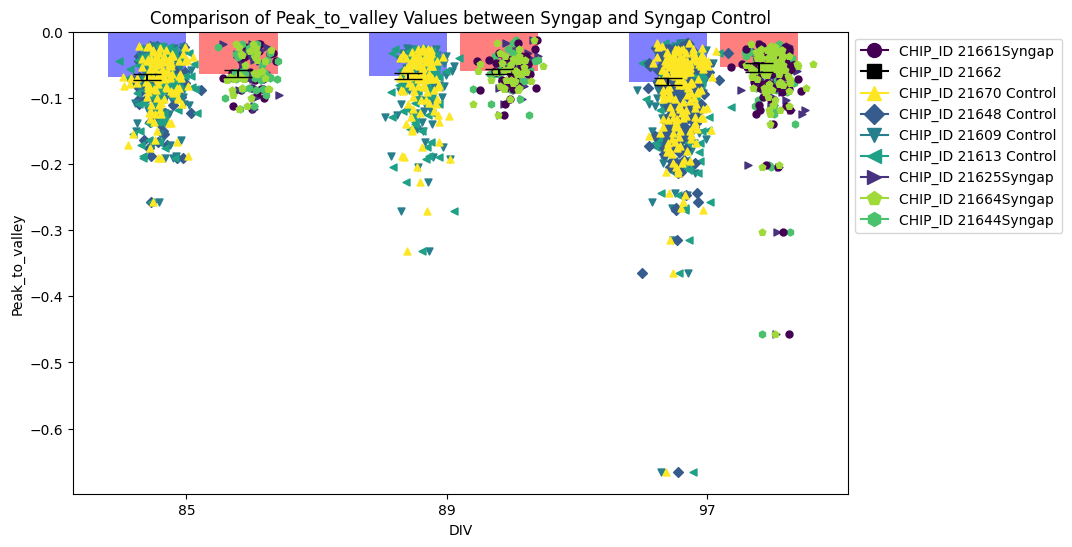

In [78]:
#
def plot_graph(df,output_type='FR'):
    # Filter the DataFrame for 'Syngap' and 'Syngap control' lines
    syngap_df = df[df['line'] == 'Syngap']
    syngap_control_df = df[df['line'] == 'syngap control']

    # Create a bar plot with 'Syngap' and 'Syngap control' side by side for each unique 'DIV'
    unique_div_values = sorted(df['DIV'].unique())
    bar_width = 0.3  # Width of each bar
    scatter_width = 0.1  # Width of scatter points

    # Calculate the positions for 'Syngap' and 'Syngap control' bars and scatter points
    syngap_control_positions = np.arange(len(unique_div_values))
    syngap_positions = syngap_control_positions + bar_width + scatter_width / 2

    # Calculate the average FR values for 'Syngap' and 'Syngap control' for each DIV
    syngap_means = [syngap_df[syngap_df['DIV'] == div][output_type].median() for div in unique_div_values]
    syngap_control_means = [syngap_control_df[syngap_control_df['DIV'] == div][output_type].median() for div in unique_div_values]
    syngap_sems = [syngap_df[syngap_df['DIV'] == div][output_type].sem() for div in unique_div_values]
    syngap_control_sems = [syngap_control_df[syngap_control_df['DIV'] == div][output_type].sem() for div in unique_div_values]
    
    chip_id_to_marker = {
        21661: 'o',
        21662: 's',
        21670: '^',
        21648: 'D',
        21609: 'v',
        21613: '<',
        21625: '>',
        21664: 'p',
        21644: 'h'
    }
    # Create a dictionary to map CHIP_ID values to unique colors
    unique_chip_ids = df['CHIP_ID'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_chip_ids)))  # Use a colormap for unique colors
    chip_id_to_color = dict(zip(unique_chip_ids, colors))

    # Create legend handles and labels for CHIP_ID
    legend_handles = []
    legend_labels = []
    for chip_id, marker in chip_id_to_marker.items():
        color = chip_id_to_color.get(chip_id, 'black')
        if chip_id in [21670, 21648, 21609, 21613]:
            chip_id = str(chip_id) + ' Control'
        if chip_id in [21625, 21661, 21664, 21644]:
            chip_id = str(chip_id) + 'Syngap'
        legend_handles.append(plt.Line2D([0], [0], marker=marker, color=color, markersize=10, label=f'CHIP_ID {chip_id}'))
        legend_labels.append(f'CHIP_ID {chip_id}')
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(syngap_positions, syngap_means, label='Syngap', yerr=syngap_sems,width=bar_width, color='red', align='center',alpha=0.5, ecolor='black', capsize=10,linewidth=30)
    plt.bar(syngap_control_positions, syngap_control_means, yerr=syngap_control_sems,label='Syngap control', width=bar_width, color='blue', align='center',alpha=0.5, ecolor='black', capsize=10,linewidth=30)

    # Add scatter points for all data points on appropriate DIV bars
    for div in unique_div_values:
        syngap_x = syngap_positions[unique_div_values.index(div)] + scatter_width / 2
        syngap_y = syngap_df[syngap_df['DIV'] == div][output_type]
        
        syngap_control_x = syngap_control_positions[unique_div_values.index(div)] + scatter_width / 2
        syngap_control_y = syngap_control_df[syngap_control_df['DIV'] == div][output_type]
    # Plot scatter points with different marker shapes based on CHIP_ID
        for chip_id in df[df['DIV'] == div]['CHIP_ID'].unique():
            chip_id_x = syngap_x if chip_id in syngap_df[syngap_df['DIV'] == div]['CHIP_ID'].unique() else syngap_control_x
            chip_id_y = syngap_y if chip_id in syngap_df[syngap_df['DIV'] == div]['CHIP_ID'].unique() else syngap_control_y
            marker = chip_id_to_marker.get(chip_id, 'o')  # Default to 'o' if CHIP_ID not in the dictionary
            # Assign unique colors to each CHIP_ID
            color = chip_id_to_color.get(chip_id, 'black')
            noise = np.random.normal(0, 0.05,len(chip_id_y))
            chip_id_y_with_noise = chip_id_y 
            
            plt.scatter([chip_id_x] * len(chip_id_y_with_noise)+noise, chip_id_y_with_noise, label=f'CHIP_ID {chip_id}', marker=marker, s=25,color = color)

    # Set x-axis labels and ticks
    plt.xticks(syngap_control_positions + bar_width /2, unique_div_values)

    # Customize the plot
    plt.title(f'Comparison of {output_type} Values between Syngap and Syngap Control')
    plt.xlabel('DIV')
    plt.ylabel(f'{output_type}')
    #plt.legend()
    # Create a custom legend for CHIP_ID
    plt.legend(handles=legend_handles, labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()
plot_graph(df.copy(),'FR')
plot_graph(df.copy(),'Amplitude Median')
plot_graph(df.copy(),'Peak_to_trough')
plot_graph(df.copy(),'half_width')
plot_graph(df.copy(),'Peak_to_valley')

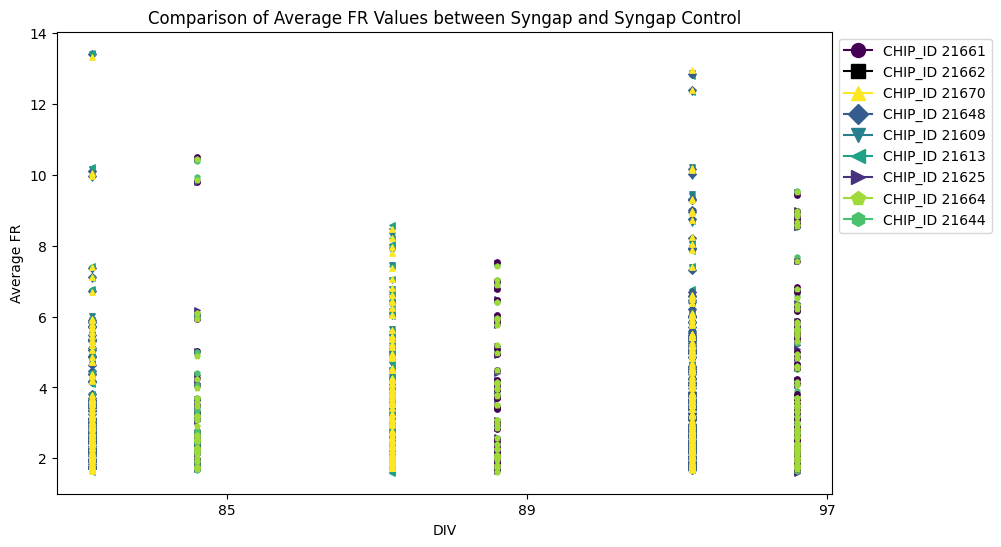

In [51]:
# Filter the DataFrame for 'Syngap' and 'Syngap control' lines
syngap_df = df[df['line'] == 'Syngap']
syngap_control_df = df[df['line'] == 'syngap control']

# Create a bar plot with 'Syngap' and 'Syngap control' side by side for each unique 'DIV'
unique_div_values = sorted(df['DIV'].unique())
bar_width = 0.3  # Width of each bar
scatter_width = 0.1  # Width of scatter points

# Calculate the positions for 'Syngap' and 'Syngap control' bars and scatter points
syngap_control_positions = np.arange(len(unique_div_values))
syngap_positions = syngap_control_positions + bar_width + scatter_width / 2

# Calculate the average FR values for 'Syngap' and 'Syngap control' for each DIV
syngap_means = [syngap_df[syngap_df['DIV'] == div]['FR'].mean() for div in unique_div_values]
syngap_control_means = [syngap_control_df[syngap_control_df['DIV'] == div]['FR'].mean() for div in unique_div_values]
chip_id_to_marker = {
    21661: 'o',
    21662: 's',
    21670: '^',
    21648: 'D',
    21609: 'v',
    21613: '<',
    21625: '>',
    21664: 'p',
    21644: 'h'
}

# Create a dictionary to map CHIP_ID values to unique colors
unique_chip_ids = df['CHIP_ID'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_chip_ids)))  # Use a colormap for unique colors
chip_id_to_color = dict(zip(unique_chip_ids, colors))

# Create legend handles and labels for CHIP_ID
legend_handles = []
legend_labels = []
for chip_id, marker in chip_id_to_marker.items():
    color = chip_id_to_color.get(chip_id, 'black')
    legend_handles.append(plt.Line2D([0], [0], marker=marker, color=color, markersize=10, label=f'CHIP_ID {chip_id}'))
    legend_labels.append(f'CHIP_ID {chip_id}')

# Create the bar plot
plt.figure(figsize=(10, 6))
for div in unique_div_values:
    syngap_x = syngap_positions[unique_div_values.index(div)] + scatter_width / 2
    syngap_y = syngap_df[syngap_df['DIV'] == div]['FR']
    
    syngap_control_x = syngap_control_positions[unique_div_values.index(div)] + scatter_width / 2
    syngap_control_y = syngap_control_df[syngap_control_df['DIV'] == div]['FR']
    
    # Plot scatter points with different marker shapes based on CHIP_ID and unique colors
    for chip_id in df[df['DIV'] == div]['CHIP_ID'].unique():
        chip_id_x = syngap_x if chip_id in syngap_df[syngap_df['DIV'] == div]['CHIP_ID'].unique() else syngap_control_x
        chip_id_y = syngap_y if chip_id in syngap_df[syngap_df['DIV'] == div]['CHIP_ID'].unique() else syngap_control_y
        marker = chip_id_to_marker.get(chip_id, 'o')  # Default to 'o' if CHIP_ID not in the dictionary
        
        # Add random noise to scatter points for visibility
        noise = np.random.normal(0, 0.05, len(chip_id_y))
        chip_id_y_with_noise = chip_id_y + noise
        
        # Assign unique colors to each CHIP_ID
        color = chip_id_to_color.get(chip_id, 'black')
        
        plt.scatter([chip_id_x] * len(chip_id_y_with_noise), chip_id_y_with_noise, marker=marker, s=15, color=color)

# Set x-axis labels and ticks
plt.xticks(syngap_positions + bar_width / 2, unique_div_values)

# Customize the plot
plt.title('Comparison of Average FR Values between Syngap and Syngap Control')
plt.xlabel('DIV')
plt.ylabel('Average FR')

# Create a custom legend for CHIP_ID
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()